# Exploratory Data Analysis of RePEc User Info

This notebook aims to perform an exploratory data analysis (EDA) on a dataset containing user info related to the Research Papers in Economics (RePEc) database. 

## Dataset Schema

The dataset includes the following columns:
- `id`: Unique identifier of the tweet.
- `location`: User's location.
- `name`: User's name.
- `username`: Twitter username.
- `verified`: Blue check.
- `followers_count`, `following_count`, `tweet_count`, `listed_count`: Usage Metrics.

## Objectives

1. Understand the basic structure and content of the dataset.
2. Analyze the distribution of usage metrics (followers, tweets, etc.).
3. Explore the effect of variables on each other.

**Author: Eric Uehling**  
*Date: 3.20.24*

## Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset_path = '../data/csv/cleaned_RePEc_userinfo.csv'
data = pd.read_csv(dataset_path)

data.head()

,id,location,name,username,verified,followers_count,following_count,tweet_count,listed_count,RePEc_id
0,766166816922173440,"Sintok, Malaysia",Md Mahmudul Alam,m_mahmudul_alam,False,494,329,89,1,pal276
1,962979660362584064,NaN,أبو جويرية,mouawiya,False,6,4,11,4,pal278
2,986652282677792768,"Makurdi, Nigeria",Raymond Aor PhD,aor_raymond,False,178,910,21,3,pao18
3,773573540608172032,NaN,Kim Abildgren,kim_abildgren,False,113,0,0,11,pab325
4,345981686,Paris,Sofiane Aboura,sofianeaboura,False,593,549,3143,19,pab28


## Preliminary Data Overview

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1177 non-null   int64 
 1   location         934 non-null    object
 2   name             1177 non-null   object
 3   username         1177 non-null   object
 4   verified         1177 non-null   bool  
 5   followers_count  1177 non-null   int64 
 6   following_count  1177 non-null   int64 
 7   tweet_count      1177 non-null   int64 
 8   listed_count     1177 non-null   int64 
 9   RePEc_id         1177 non-null   object
dtypes: bool(1), int64(5), object(4)
memory usage: 84.0+ KB


## Univariate Analysis

### Verified Status Distribution
Understanding the distribution of verified versus unverified users helps us gauge the representation of potentially influential users within the dataset.

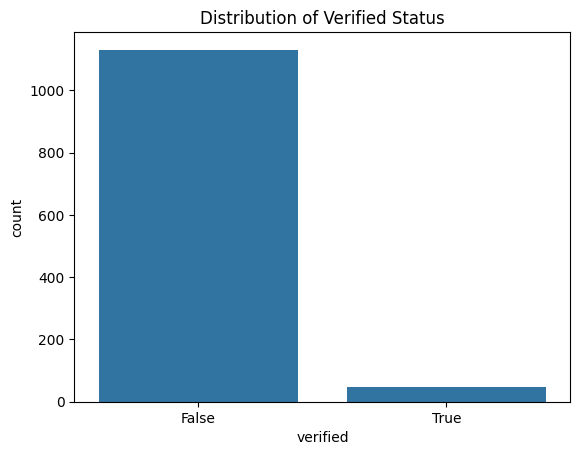

In [3]:
sns.countplot(x='verified', data=data)
plt.title('Distribution of Verified Status')
plt.show()

### Top 10 User Locations
The location of users can indicate geographical diversity and potentially highlight regions with higher concentrations of users.

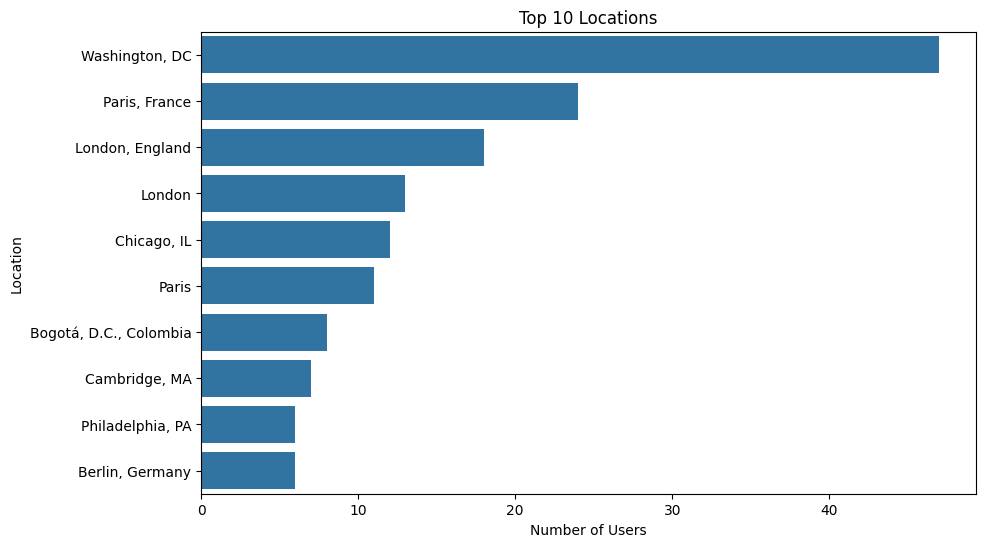

In [4]:
# Visualizing the top 10 user locations
top_locations = data['location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 10 Locations')
plt.xlabel('Number of Users')
plt.ylabel('Location')
plt.show()

### Distribution of Numerical Variables
Analyzing the distribution of numerical variables such as followers count, following count, tweet count, and listed count will help us understand user engagement and influence.

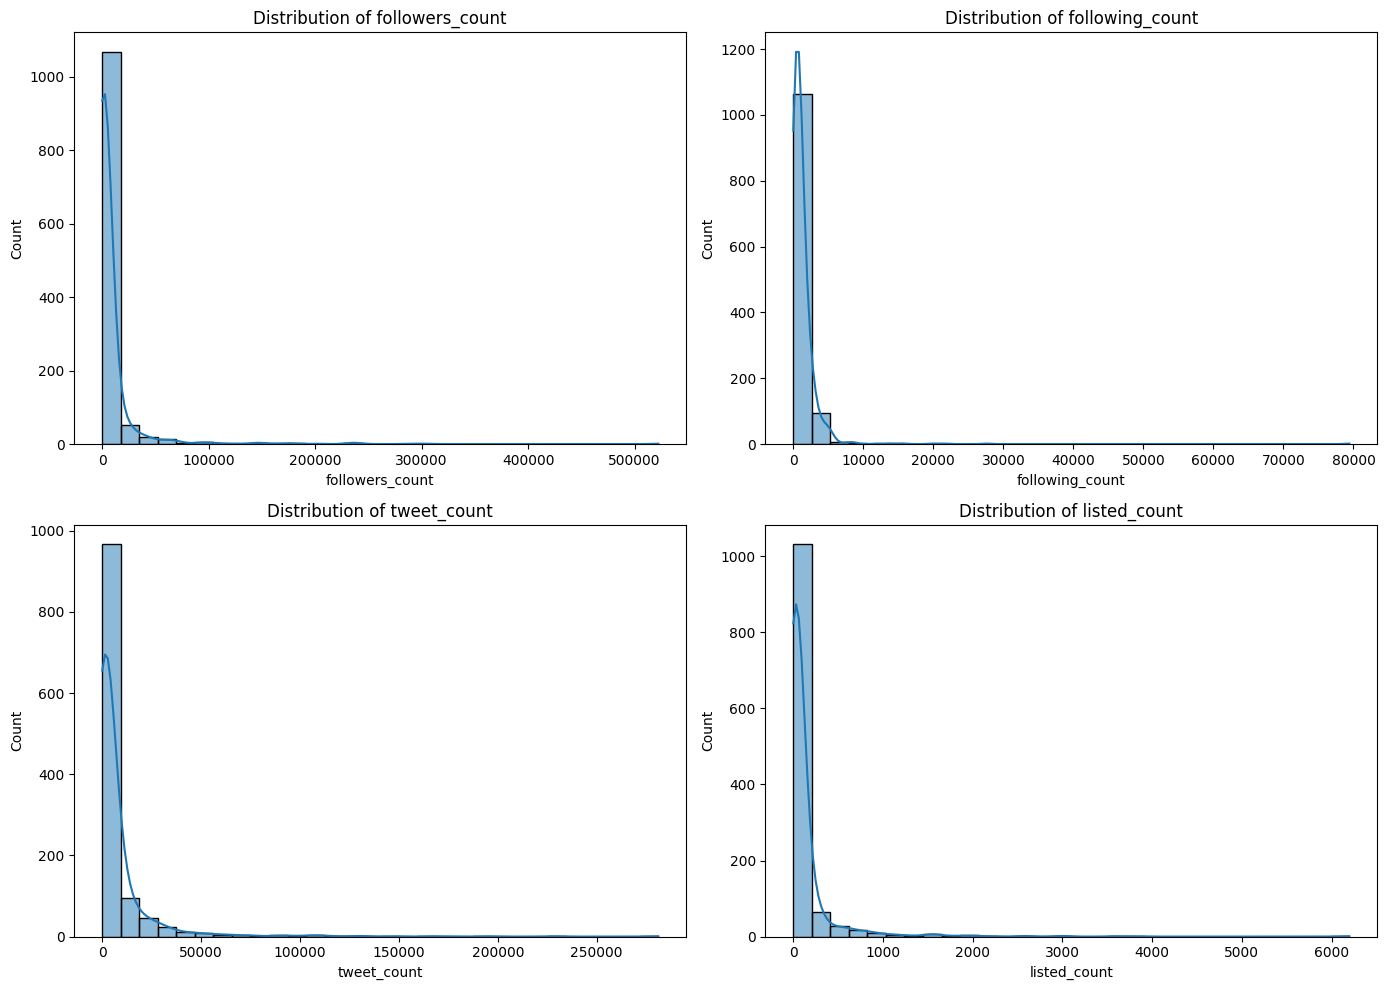

In [5]:
# Distribution plots for numerical variables
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
numerical_columns = ['followers_count', 'following_count', 'tweet_count', 'listed_count']

for col, ax in zip(numerical_columns, axs.flatten()):
    sns.histplot(data[col], bins=30, ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## Bivariate Analysis
In this section, we explore relationships between pairs of variables.

### Impact of Verification Status
Verified users are often considered more influential or notable. Here, we investigate how being verified relates to other metrics of influence and engagement. Specifically, the effect of a verification status on our numerical columns.

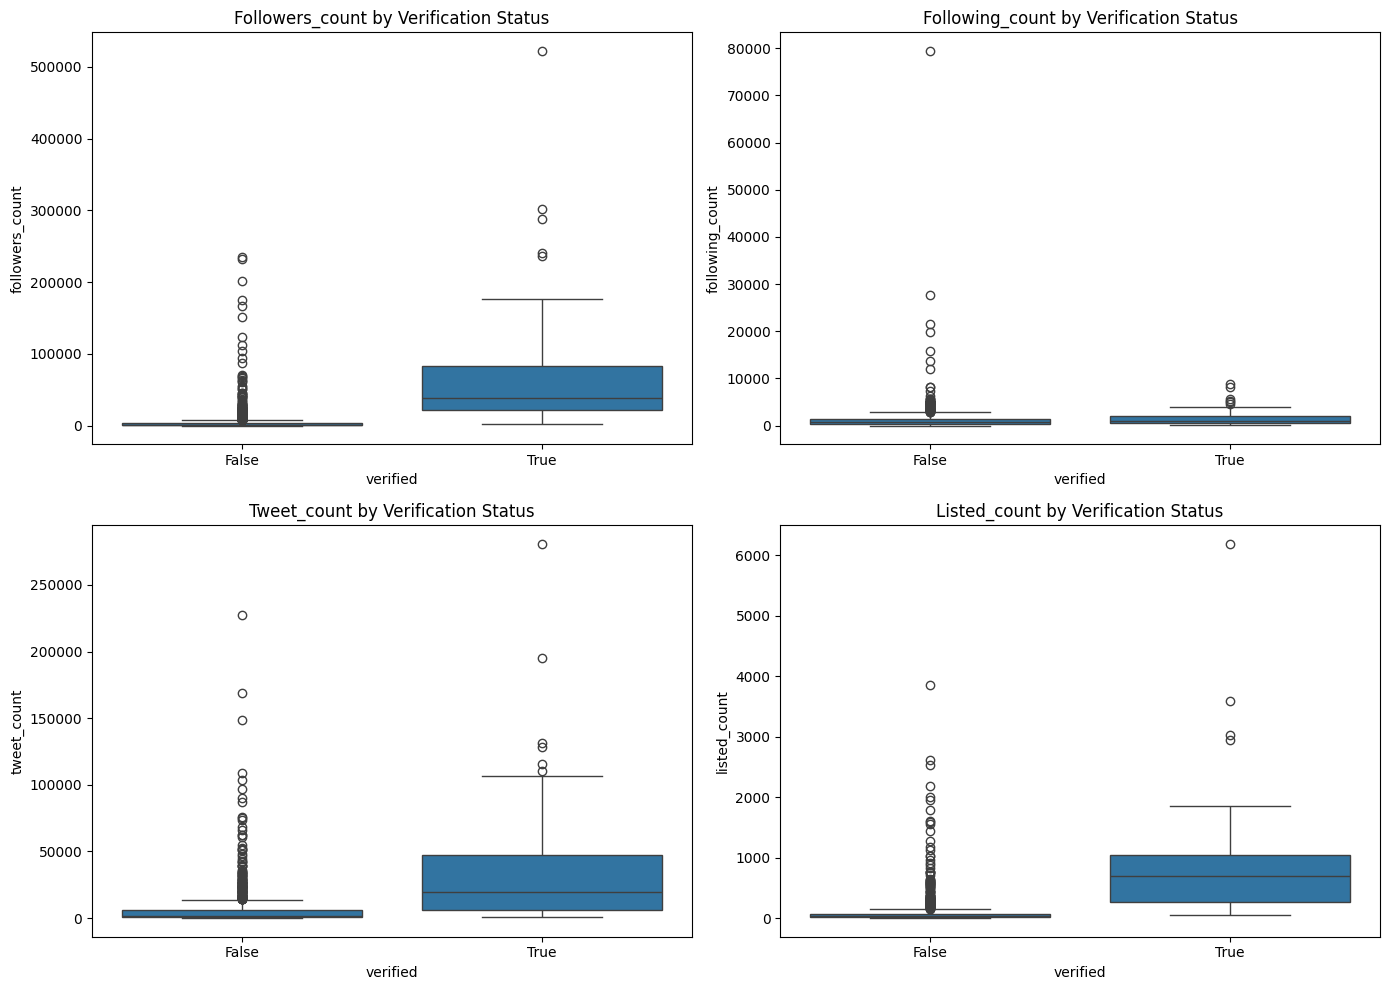

In [6]:
# Bivariate analysis: Box plots for numerical variables by verification status
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for col, ax in zip(numerical_columns, axs.flatten()):
    sns.boxplot(x='verified', y=col, data=data, ax=ax)
    ax.set_title(f'{col.capitalize()} by Verification Status')

plt.tight_layout()
plt.show()

### Correlation Among Numerical Features
Identifying correlations between numerical features can reveal interesting relationships and dependencies among the user attributes.

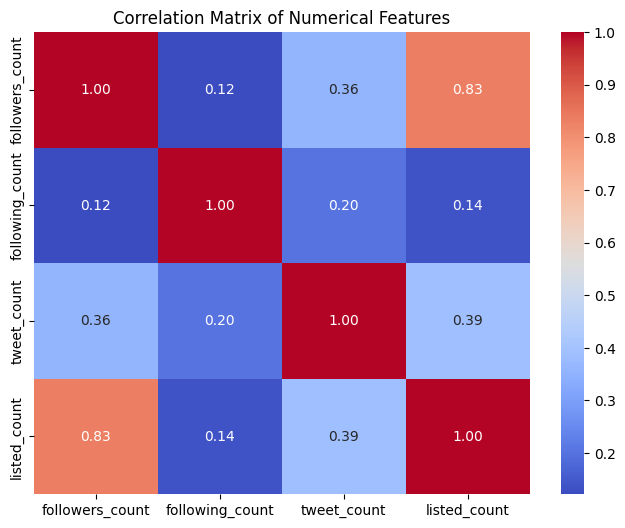

In [7]:
# Correlation matrix heatmap of numerical features
corr = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Feature Engineering 
Enhancing the dataset with new features can provide deeper insights and potentially improve the performance of predictive models.

### Engagement Ratio
An engagement ratio (followers count divided by following count) might offer insights into a user's popularity or influence level.

In [8]:
data['engagement_ratio'] = data['followers_count'] / (data['following_count'] + 1)
data[['followers_count', 'following_count', 'engagement_ratio']].head()

,followers_count,following_count,engagement_ratio
0,494,329,1.496970
1,6,4,1.200000
2,178,910,0.195390
3,113,0,113.000000
4,593,549,1.078182


### Activity Level
Categorizing users based on their tweet count could help in analyzing user activity levels.

In [9]:
# Defining thresholds for low, medium, and high activity
low_threshold = data['tweet_count'].quantile(0.33)
high_threshold = data['tweet_count'].quantile(0.66)

# Function to categorize activity level
def categorize_activity(tweet_count):
    if tweet_count <= low_threshold:
        return 'Low'
    elif tweet_count <= high_threshold:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
data['activity_level'] = data['tweet_count'].apply(categorize_activity)
data[['tweet_count', 'activity_level']].head()

,tweet_count,activity_level
0,89,Low
1,11,Low
2,21,Low
3,0,Low
4,3143,Medium


### Influence Score
We propose an influence score, a composite metric derived from followers count, listed count, and possibly tweet count, to identify the platform's most influential users.

In [10]:
# Simple influence score example
data['influence_score'] = (0.5 * data['followers_count'] + 0.3 * data['tweet_count'] + 0.2 * data['listed_count']) / data['followers_count'].max()

data[['followers_count', 'tweet_count', 'listed_count', 'influence_score']].head()

,followers_count,tweet_count,listed_count,influence_score
0,494,89,1,0.000525
1,6,11,4,0.000014
2,178,21,3,0.000184
3,113,0,11,0.000112
4,593,3143,19,0.002381


## Effect of Follower Count on Other Features
In this section, we delve into understanding how the follower count, a proxy for user popularity or influence, affects other user metrics. This exploration helps in identifying patterns that might indicate how influential users engage with their platform and audience.

### Correlation Analysis
First, let's perform a correlation analysis to see the linear relationship between follower count and other numerical features.

In [11]:
# Correlation of follower count with other features
follower_corr = data[['followers_count', 'following_count', 'tweet_count', 'listed_count', 'engagement_ratio', 'influence_score']].corr()['followers_count'].drop('followers_count')
follower_corr

following_count     0.121929
tweet_count         0.355180
listed_count        0.834228
engagement_ratio    0.295527
influence_score     0.952291
Name: followers_count, dtype: float64

### Visual Analysis
Graphical representations can provide insights into the nature of these relationships, highlighting potential non-linear trends or anomalies.

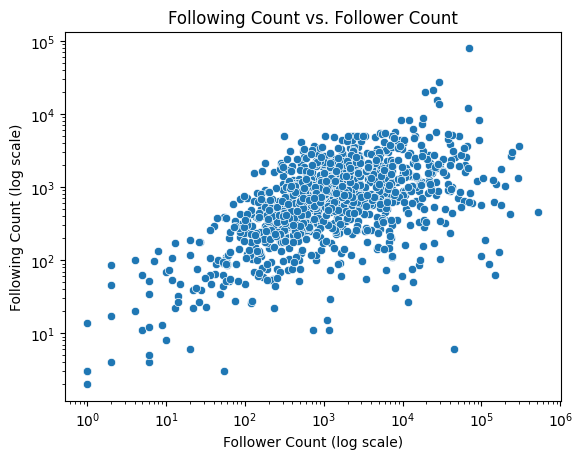

In [12]:
sns.scatterplot(x='followers_count', y='following_count', data=data)
plt.title('Following Count vs. Follower Count')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Follower Count (log scale)')
plt.ylabel('Following Count (log scale)')
plt.show()

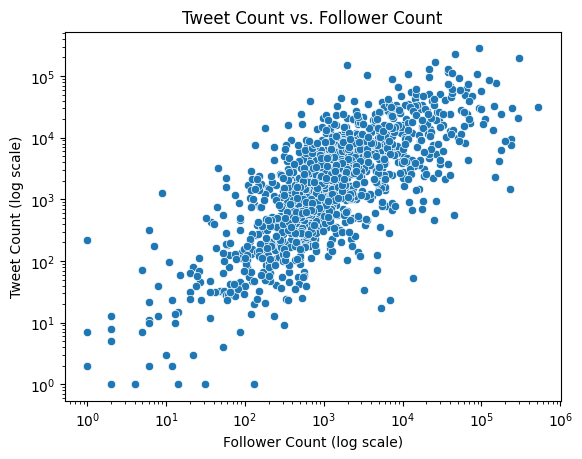

In [13]:
sns.scatterplot(x='followers_count', y='tweet_count', data=data)
plt.title('Tweet Count vs. Follower Count')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Follower Count (log scale)')
plt.ylabel('Tweet Count (log scale)')
plt.show()

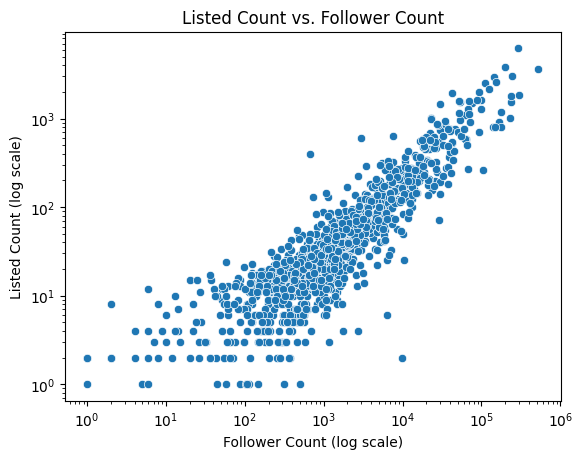

In [14]:
sns.scatterplot(x='followers_count', y='listed_count', data=data)
plt.title('Listed Count vs. Follower Count')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Follower Count (log scale)')
plt.ylabel('Listed Count (log scale)')
plt.show()

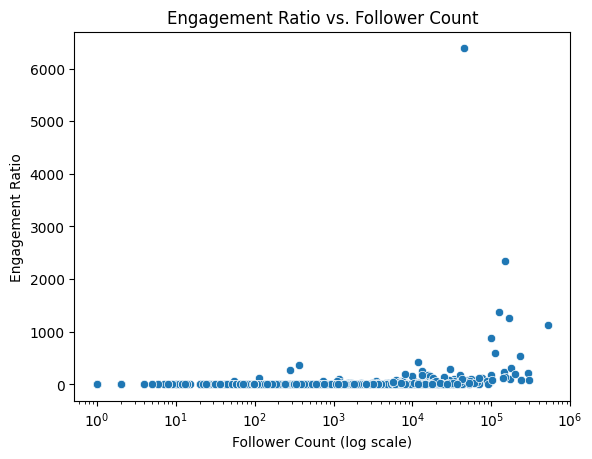

In [15]:
sns.scatterplot(x='followers_count', y='engagement_ratio', data=data)
plt.title('Engagement Ratio vs. Follower Count')
plt.xscale('log')
plt.xlabel('Follower Count (log scale)')
plt.ylabel('Engagement Ratio')
plt.show()

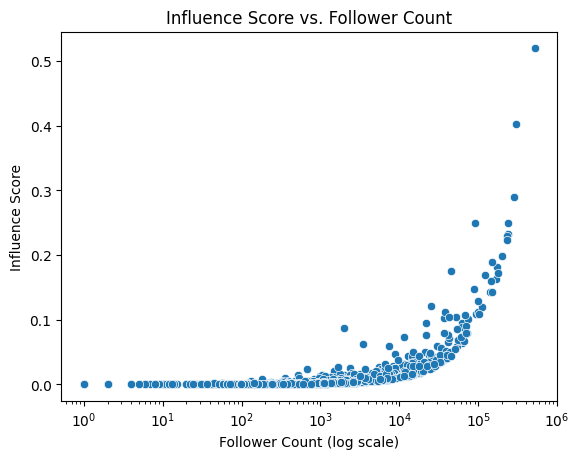

In [16]:
sns.scatterplot(x='followers_count', y='influence_score', data=data)
plt.title('Influence Score vs. Follower Count')
plt.xscale('log')
plt.xlabel('Follower Count (log scale)')
plt.ylabel('Influence Score')
plt.show()